## <small>
Copyright (c) 2017-21 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning: A Visual Approach
## by Andrew Glassner, https://glassner.com
### Order: https://nostarch.com/deep-learning-visual-approach
### GitHub: https://github.com/blueberrymusic
------

### What's in this notebook

This notebook is provided to help you work with Keras and TensorFlow. It accompanies the bonus chapters for my book. The code is in Python3, using the versions of libraries as of April 2021.

Note that I've included the output cells in this saved notebook, but Jupyter doesn't save the variables or data that were used to generate them. To recreate any cell's output, evaluate all the cells from the start up to that cell. A convenient way to experiment is to first choose "Restart & Run All" from the Kernel menu, so that everything's been defined and is up to date. Then you can experiment using the variables, data, functions, and other stuff defined in this notebook.

## Bonus Chapter 2 - Notebook 6: MNIST training history

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')

In [2]:
# Workaround for Keras issues on Mac computers (you can comment this
# out if you're not on a Mac, or not having problems)
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# Make a File_Helper for saving and loading files.

save_files = False

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

Using TensorFlow backend.


In [4]:
# Train our 2-layer MNIST classifier for 100 epochs.
random_seed = 42

# load MNIST data and save sizes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# convert to floating-point
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# save the original y_train and y_test 
original_y_train = y_train
original_y_test = y_test

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

# reshape samples to 2D grid, one line per image
X_train = X_train.reshape([X_train.shape[0], number_of_pixels])
X_test = X_test.reshape([X_test.shape[0], number_of_pixels])

def make_model():
    model = Sequential()
    model.add(Dense(number_of_pixels, activation='relu',
                    input_shape=[number_of_pixels]))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

# make the model
model = make_model()

np.random.seed(random_seed)

# call fit() to train the model, and save the history
one_hidden_layer_history = model.fit(X_train, y_train,
    validation_split=0.25, epochs=100, batch_size=256, verbose=2)

Epoch 1/100
176/176 - 4s - loss: 0.3394 - accuracy: 0.9046 - val_loss: 0.1767 - val_accuracy: 0.9497
Epoch 2/100
176/176 - 2s - loss: 0.1411 - accuracy: 0.9595 - val_loss: 0.1320 - val_accuracy: 0.9608
Epoch 3/100
176/176 - 2s - loss: 0.0924 - accuracy: 0.9736 - val_loss: 0.1076 - val_accuracy: 0.9687
Epoch 4/100
176/176 - 2s - loss: 0.0657 - accuracy: 0.9821 - val_loss: 0.0992 - val_accuracy: 0.9706
Epoch 5/100
176/176 - 2s - loss: 0.0486 - accuracy: 0.9863 - val_loss: 0.0929 - val_accuracy: 0.9726
Epoch 6/100
176/176 - 2s - loss: 0.0383 - accuracy: 0.9900 - val_loss: 0.0844 - val_accuracy: 0.9753
Epoch 7/100
176/176 - 2s - loss: 0.0273 - accuracy: 0.9937 - val_loss: 0.0871 - val_accuracy: 0.9735
Epoch 8/100
176/176 - 2s - loss: 0.0216 - accuracy: 0.9953 - val_loss: 0.0820 - val_accuracy: 0.9756
Epoch 9/100
176/176 - 2s - loss: 0.0165 - accuracy: 0.9967 - val_loss: 0.0806 - val_accuracy: 0.9773
Epoch 10/100
176/176 - 2s - loss: 0.0124 - accuracy: 0.9981 - val_loss: 0.0813 - val_accura

Epoch 80/100
176/176 - 3s - loss: 2.0292e-06 - accuracy: 1.0000 - val_loss: 0.1299 - val_accuracy: 0.9802
Epoch 81/100
176/176 - 3s - loss: 1.8500e-06 - accuracy: 1.0000 - val_loss: 0.1314 - val_accuracy: 0.9803
Epoch 82/100
176/176 - 3s - loss: 1.6889e-06 - accuracy: 1.0000 - val_loss: 0.1320 - val_accuracy: 0.9804
Epoch 83/100
176/176 - 3s - loss: 1.5573e-06 - accuracy: 1.0000 - val_loss: 0.1327 - val_accuracy: 0.9803
Epoch 84/100
176/176 - 3s - loss: 1.3967e-06 - accuracy: 1.0000 - val_loss: 0.1335 - val_accuracy: 0.9803
Epoch 85/100
176/176 - 3s - loss: 1.2906e-06 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 0.9805
Epoch 86/100
176/176 - 3s - loss: 1.1777e-06 - accuracy: 1.0000 - val_loss: 0.1345 - val_accuracy: 0.9809
Epoch 87/100
176/176 - 3s - loss: 1.0804e-06 - accuracy: 1.0000 - val_loss: 0.1353 - val_accuracy: 0.9806
Epoch 88/100
176/176 - 3s - loss: 9.8503e-07 - accuracy: 1.0000 - val_loss: 0.1373 - val_accuracy: 0.9803
Epoch 89/100
176/176 - 3s - loss: 9.0242e-07 -

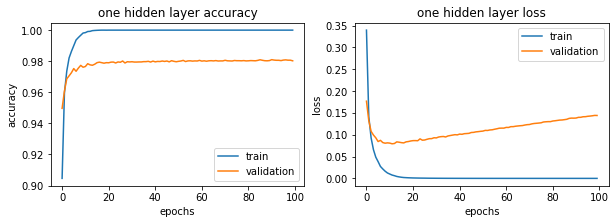

In [5]:
history = one_hidden_layer_history  # a copy with a shorter name
xs = range(len(history.history['accuracy']))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(xs, history.history['accuracy'], label='train')
plt.plot(xs, history.history['val_accuracy'], label='validation')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('one hidden layer accuracy')

plt.subplot(1, 2, 2)
plt.plot(xs, history.history['loss'], label='train')
plt.plot(xs, history.history['val_loss'], label='validation')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('one hidden layer loss')

file_helper.save_figure('one-hidden-layer-acc-loss')
plt.show()

In [6]:
# What's inside the history?
dir(one_hidden_layer_history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [7]:
# What's inside the 'history' field?
dir(one_hidden_layer_history.history)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']